In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
plt.rcParams["figure.figsize"]=(15,5)

In [397]:
df = pd.read_csv('Datos Sol.dat', sep='\s+', names=['Year','Month','Day','SSN'],skiprows=2).dropna()
df['Date'] = pd. to_datetime(df[['Year','Month','Day']])
limite=pd.to_datetime("2012-01-01")
datos_f=df[df['Date'] <= limite]
prom=datos_f['SSN'].mean()
datos_f['SSN']-=prom
datos_f

C:\Users\cataf\AppData\Local\Temp\ipykernel_25700\2552876701.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_f['SSN']-=prom


,Year,Month,Day,SSN,Date
0,1945,1,1,-60.949657,1945-01-01
1,1945,1,2,-70.949657,1945-01-02
2,1945,1,3,-69.949657,1945-01-03
3,1945,1,4,-68.949657,1945-01-04
4,1945,1,5,-59.949657,1945-01-05
...,...,...,...,...,...
24467,2011,12,28,-8.949657,2011-12-28
24468,2011,12,29,-3.949657,2011-12-29
24469,2011,12,30,-12.949657,2011-12-30
24470,2011,12,31,-15.949657,2011-12-31


1.1) Periodo del ciclo solar

In [398]:
transf=abs(np.fft.fft(datos_f["SSN"]))
frecs=np.fft.fftfreq(len(datos_f["SSN"]))
transf,frecs

(array([1.76441972e-10, 3.87667501e+04, 2.34715073e+05, ...,
        1.03800578e+05, 2.34715073e+05, 3.87667501e+04]),
 array([ 0.00000000e+00,  4.08630271e-05,  8.17260543e-05, ...,
        -1.22589081e-04, -8.17260543e-05, -4.08630271e-05]))

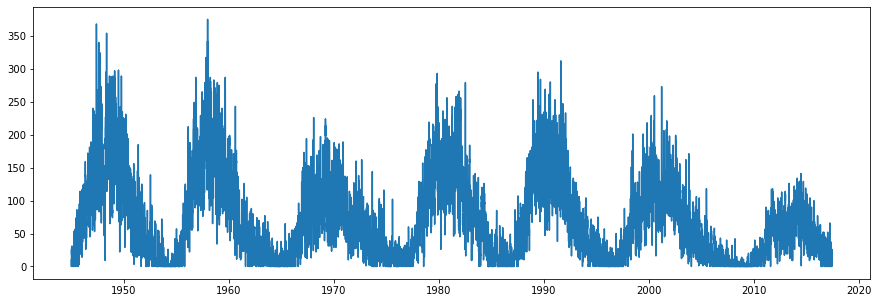

In [399]:
plt.plot(df['Date'], df["SSN"])
plt.show()

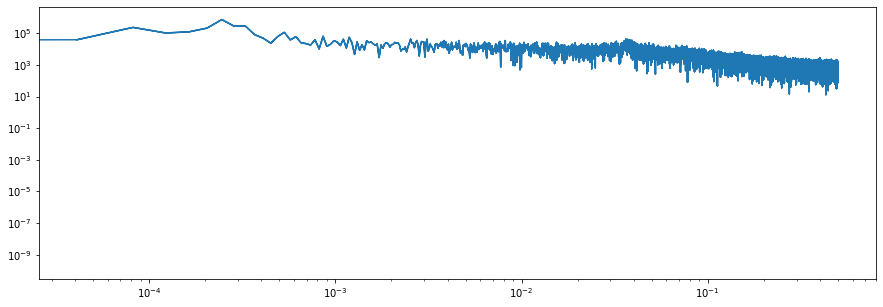

In [400]:
plt.plot(abs(frecs), abs(transf))
plt.xscale("log")
plt.yscale("log")
#promedio

In [401]:
f_ppal=abs(frecs[np.argmax(transf)])
periodo=1/f_ppal
periodo,f_ppal

(4078.6666666666665, 0.0002451781627983001)

In [402]:
periodo_años=periodo/365.25
print("El periodo del ciclo de actividad solar en años es de ",round(periodo_años,0)," años")

El periodo del ciclo de actividad solar en años es de  11.0  años


1.2) Reducción de ruido: filtro pasabajas

In [403]:
n=len(datos_f["SSN"])
alpha=1000
f=np.fft.fftfreq(n)
len(f)

24472

In [404]:
filtro=np.exp(-(f*alpha)**2)
#0.99833161
filtro=np.sort(filtro)[::-1]
#señal_filtrada=np.fft.ifft(transf*filtro)
señal_filtrada=np.fft.ifft(transf*filtro)

1.2.a)

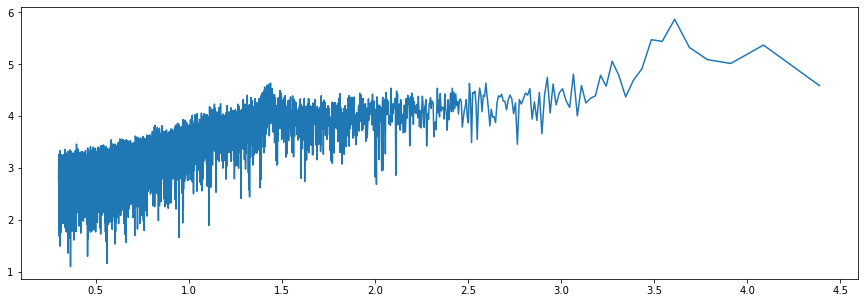

In [405]:
plt.plot(np.abs(np.log10(f[1:n//2])),np.abs(np.log10(transf[1:n//2])))

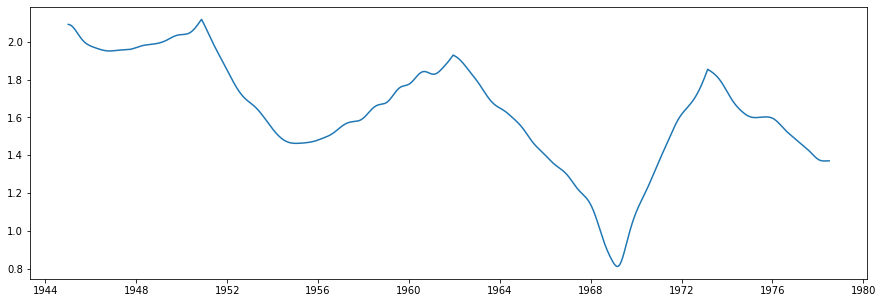

In [407]:
plt.plot((datos_f["Date"][1:n//2]),np.abs(np.log10(señal_filtrada[1:n//2])))
#plt.plot(np.abs(np.log10(f[1:n//2]),np.abs(np.log10(señal_filtrada[1:n//2]))))
#plt.plot(f,señal_filtrada)

1.2.b)

In [ ]:
regreso_original=np.fft.ifft(transf).real
regreso_filtrada=np.fft.ifft(señal_filtrada).real

regreso_original

array([2961.60200238, 1875.02155553, 1403.41481183, ..., 1083.6473963 ,
       1403.41481183, 1875.02155553])

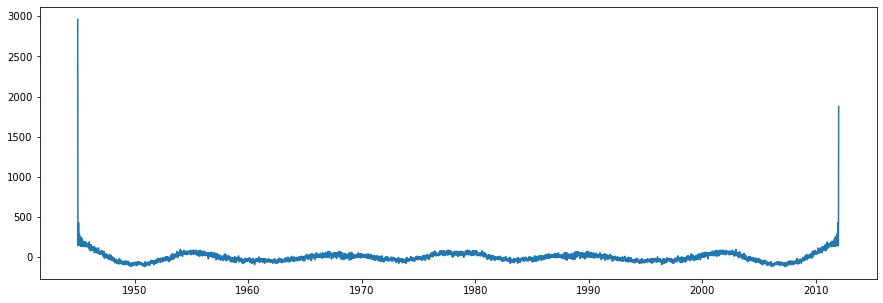

In [ ]:
#plt.plot(datos_f["Date"][40:-40],regreso_original[40:-40])
plt.plot(datos_f["Date"].values,regreso_original)

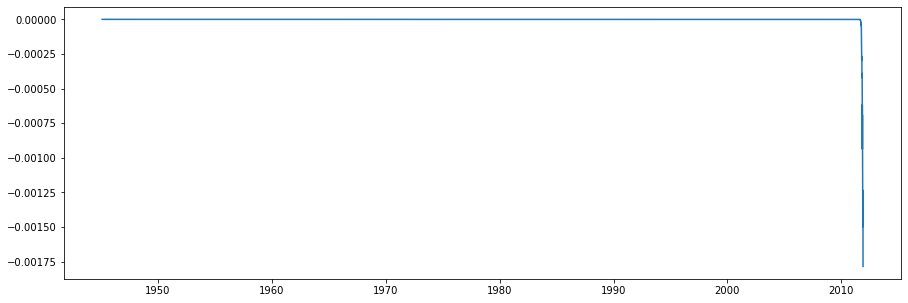

In [ ]:
plt.plot(datos_f["Date"][30:-30],regreso_filtrada[30:-30])

1.3) Extrapolación de funciones (más o menos) periódicas

In [ ]:
n_armonico=10
fk=np.array(f[:n_armonico])
fk=np.append(fk,f[-n_armonico:])
Fk=np.array(transf[:n_armonico])
Fk=np.append(Fk,transf[-n_armonico:])
n#longitud dataframe
#len(fk)
print(len(fk),len(Fk))

20 20


In [ ]:
inicio=date(1945, 1, 1)
fin=date(2045, 1, 1)
dias_total=(pd.to_datetime(fin) - pd.to_datetime(inicio)).days
tiempo_dias=np.arange(0, dias_total + 1)
tiempo_dias

array([    0,     1,     2, ..., 36523, 36524, 36525])

In [ ]:
inicio=date(1945, 1, 1)
agosto=date(2024,8,23)
dias_agosto=(pd.to_datetime(agosto) - pd.to_datetime(inicio)).days
dias_agosto

In [ ]:
señal_extrap=np.zeros(len(tiempo_dias), dtype=complex)
for i in range(len(fk)):
    #señal_extrap= np.append(señal_extrap,Fk[i] * np.exp(2j * np.pi * fk[i] * tiempo_dias[i]))
    señal_extrap+=Fk[i] * np.exp(2j * np.pi * fk[i] * tiempo_dias)
señal_extrap/=n
len(señal_extrap)
#debería ser un array? de qué longitud

36526

c:\Users\cataf\LAST\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


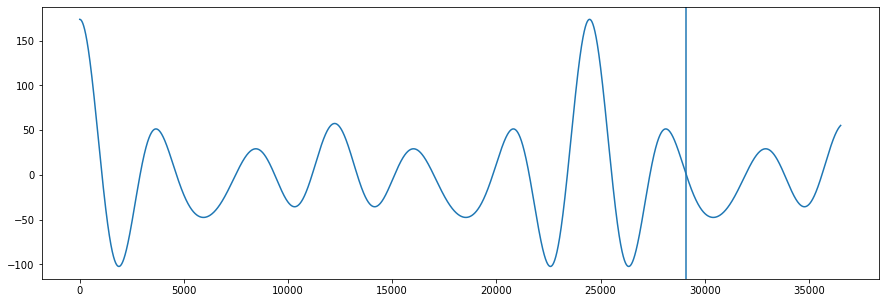

In [ ]:
plt.plot(tiempo_dias, señal_extrap)
plt.axvline(x=dias_agosto)
plt.show()